In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional,GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import datetime
import io
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import sys
import os
# Obtener la ruta del directorio actual
os.chdir('/home/rgadea/experimentos_software_2024')
current_dir = os.getcwd()
print(current_dir)

# Construir la ruta relativa al directorio que quieres agregar
relative_dir = os.path.join(current_dir, 'mis_pkgs/')

# Agregar la ruta relativa al sys.path
sys.path.insert(0, relative_dir)

from MIOPATIA_db import DB_management as db 


2024-05-13 19:21:43.653257: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 19:21:43.653315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 19:21:43.655097: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 19:21:43.665650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 19:21:44.482266: W tensorflow/comp

/home/rgadea/experimentos_software_2024


Voy a quedarme con los 50 atunes P1 para obtener conjunto de training y validacion

In [2]:
!pwd


/home/rgadea/experimentos_software_2024


In [3]:
filename = "hdf_agilent_220_zurich_lomosP1_def_total.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    pre_p_e1 = pre_p_e1.loc[pre_p_e1['Pollo'] != 0]
    # p_e =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_train=np.zeros((pre_p_e1.shape[0],220,8))
    y_train=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        print(Primero)
        print(Ultimo)
        print(estado)
        if estado == 0 or estado== 1:
            target = 1
        else:
            target = 0
        #target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_train[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_train[x]=target
        y_train_to_categorical = to_categorical(y_train)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_train_filtrado = X_train
#y_train_filtrado = y_train
y_train_filtrado = y_train_to_categorical

# print(X_train_filtrado.shape)
# print(y_train_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_2d = X_train_filtrado.reshape(-1, X_train_filtrado.shape[-1])
normalized_data_2d = scaler.fit_transform(data_2d)
X_train_Normalizado=normalized_data_2d.reshape(X_train_filtrado.shape)
y_train_Normalizado=y_train_filtrado # los valores ya estaban normalizados
print(X_train_Normalizado[0])
print(y_train_Normalizado.shape)

0
219
0
220
439
0
440
659
2
660
879
2
880
1099
2
1100
1319
2
1320
1539
2
1540
1759
2
1760
1979
0
1980
2199
0
2200
2419
0
2420
2639
2
2640
2859
2
2860
3079
0
3080
3299
0
3300
3519
4
3520
3739
4
3740
3959
2
3960
4179
2
4180
4399
1
4400
4619
1
4620
4839
2
4840
5059
2
5060
5279
2
5280
5499
2
5500
5719
0
5720
5939
0
5940
6159
2
6160
6379
2
6380
6599
0
6600
6819
0
6820
7039
4
7040
7259
4
7260
7479
2
7480
7699
0
7700
7919
0
7920
8139
0
8140
8359
0
8360
8579
1
8580
8799
2
8800
9019
0
9020
9239
3
9240
9459
0
9460
9679
0
9680
9899
1
9900
10119
1
10120
10339
2
10340
10559
4
10560
10779
4
10780
10999
1
11000
11219
4
11220
11439
1
11440
11659
1
11660
11879
0
11880
12099
0
12100
12319
1
12320
12539
0
12540
12759
0
12760
12979
0
12980
13199
2
13200
13419
2
13420
13639
0
13640
13859
1
13860
14079
1
14080
14299
4
14300
14519
2
14520
14739
0
14740
14959
0
14960
15179
2
15180
15399
2
15400
15619
0
15620
15839
0
15840
16059
0
16060
16279
0
16280
16499
2
16500
16719
0
16720
16939
2
16940
17159
0
17160
1737

In [4]:
filename = "lomosP2_20240430_clasificado_experto.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    pre_p_e1 = pre_p_e1.loc[pre_p_e1['Pollo'] != 0]
    pre_p_e1 =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_test=np.zeros((pre_p_e1.shape[0],220,8))
    y_test=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        #print(Primero)
        #print(Ultimo)
        #print(estado)
        if estado == 0 or estado== 1:
           target = 1
        else:
           target = 0
        # target=estado
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_test[x]=pepito[:,3:11]
        #print(X_train[x][0:4,:])       
        y_test[x]=target
        y_test_to_categorical = to_categorical(y_test)
        x=x+1


# print(X_train.shape)
# print(y_train_to_categorical.shape)
# #print(X_train[0:4,:,:])
# #print(X_train[1][0:4][:])
# print(y_train[1:20])
# print(y_train_to_categorical[1:20])
# # #Aqui filtrariamos si hay filas que no nos interesan. En este caso dejo pasar todos los casos
# print(p_e)
# # X_train_filtrado = X_train[2:][:,:]
# # y_train_filtrado = y_train[2:]
X_test_filtrado = X_test
#y_train_filtrado = y_train
y_test_filtrado = y_test_to_categorical

print(X_test_filtrado.shape)
print(y_test_filtrado.shape)
# print(X_train_filtrado[0][:,:])
# # # Vamos a normalizar o escalar los datos
# concatenamos train y test
#X_total=np.concatenate((X_train_filtrado,X_test_filtrado),axis=0)
#scaler = MinMaxScaler(feature_range=(0, 1))
#data_2d_test = X_total.reshape(-1, X_total.shape[-1])
data_2d_test = X_test_filtrado.reshape(-1, X_test_filtrado.shape[-1])
normalized_data_2d_test = scaler.transform(data_2d_test)


X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 
# la alternativa es normalizar con el total
# X_test_def=normalized_data_2d_test.reshape(X_test_filtrado.shape) 

y_test_def=y_test_filtrado # los valores ya estaban normalizados
print(X_test_def[0])

(200, 220, 8)
(200, 2)
[[9.60996183e-05 5.87443890e-01 7.42048258e-02 ... 4.12556110e-01
  9.61147203e-05 8.98459889e-01]
 [8.85688600e-05 5.75508842e-01 9.32423673e-02 ... 4.24491158e-01
  8.85825163e-05 8.98458459e-01]
 [8.71211369e-05 5.76993951e-01 8.90021629e-02 ... 4.23006049e-01
  8.71346148e-05 8.98458817e-01]
 ...
 [1.07638855e-05 4.09972734e-01 2.18285389e-02 ... 5.90027266e-01
  1.07638689e-05 8.98460829e-01]
 [1.02084275e-05 4.07783620e-01 2.18287148e-02 ... 5.92216380e-01
  1.02083596e-05 8.98460981e-01]
 [9.64335113e-06 4.05732518e-01 2.18290233e-02 ... 5.94267482e-01
  9.64323716e-06 8.98461145e-01]]


Vamos a hacer los conjuntos de entrenamiento validacion y test

In [5]:
# Divide el dataset en entrenamiento y temporal (test+validación)
# X_temp, X_test_def, y_temp, y_test_def = train_test_split(X_train_Normalizado, y_train_Normalizado, test_size=0.2, stratify=y_train_Normalizado, random_state=42)

# Divide el dataset temporal en validación y test
X_train_def, X_val_def, y_train_def, y_val_def = train_test_split(X_train_Normalizado, y_train_Normalizado, test_size=0.35, stratify=y_train_Normalizado, random_state=42)

# Ahora, X_train, X_val y X_test contienen los datos de entrada para los conjuntos de entrenamiento, validación y prueba, respectivamente.
# y_train, y_val y y_test contienen las clases correspondientes.

In [6]:
print(X_train_def.shape)
print(X_val_def.shape)
print(X_test_def.shape)
print(y_train_def.shape)
print(y_val_def.shape)
print(y_test_def.shape)

(191, 220, 8)
(103, 220, 8)
(200, 220, 8)
(191, 2)
(103, 2)
(200, 2)


In [7]:
%load_ext tensorboard

#%tensorboard --logdir logs
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [8]:
def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

In [9]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    threshold = 0.5
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [10]:
algoritmo='RMSprop'
supermax=8*4
lossfunction='categorical_crossentropy'
factor_aprendizaje=0.001
dimension_LSTM=50
dimension_dense=50
model = Sequential()
model.add(Bidirectional(GRU(50, return_sequences=False),input_shape=(220, 8)))
#model.add(Bidirectional(LSTM(50, return_sequences=True)))
#model.add(Bidirectional(LSTM(50, return_sequences=True)))
#model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(dimension_dense, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=lossfunction, optimizer=algoritmo, metrics=['accuracy'])
model.optimizer.lr=(factor_aprendizaje)
print(model.summary())

experimento="AgilentplusP1_y_P1_GRU2_2_clases_bidireccional{}_dense_onehot_{}_loss_{}_lr_{}_algoritmo_{}".format(dimension_LSTM,dimension_dense,lossfunction,factor_aprendizaje,algoritmo)
logdir="./logs/defs/{}_{}".format(experimento,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')


2024-05-13 19:21:47.292499: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-13 19:21:47.292995: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: nodofpga-2024.novalocal
2024-05-13 19:21:47.293036: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: nodofpga-2024.novalocal
2024-05-13 19:21:47.293638: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.161.7
2024-05-13 19:21:47.293941: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.161.7
2024-05-13 19:21:47.293981: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.161.7


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100)               18000     
 al)                                                             
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23152 (90.44 KB)
Trainable params: 23152 (90.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
class_names=["Buenos","Malos"]

In [12]:
def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    y_pred = model.predict(X_test_def)
    #y_pred1=y_pred[:,-1]
    y_pred2=y_pred.argmax(axis=1)
    #y_pred2=np.where(y_pred>0,1,0)
    #y_pred2=y_pred2[:,-1]
    #classes = [0, 1, 2, 3, 4] 
    classes = [0, 1]
    y_test_def2=np.argmax(y_test_def,axis=1)  
    #y_test_def2=np.where(y_test_def>0,1,0)
    cm=confusion_matrix(y_test_def2, y_pred2,labels=classes)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    figura = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figura)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [13]:
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
print(y_train_Normalizado.shape)
print(y_val_def.shape)

(294, 2)
(103, 2)


In [14]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=500, verbose=2, mode='auto', baseline=None, restore_best_weights=True)
model.fit(X_train_Normalizado, y_train_Normalizado,  initial_epoch=0, epochs=3000, batch_size=20, callbacks=[tensorboard_callback,cm_callback, early_stop], validation_data=(X_val_def, y_val_def))
# Final evaluation of the model 
scores = model.evaluate(X_test_def, y_test_def, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/3000
15/15 [==============================] - 6s 217ms/step - loss: 0.7065 - accuracy: 0.5714 - val_loss: 0.6821 - val_accuracy: 0.5728
Epoch 2/3000
15/15 [==============================] - 2s 121ms/step - loss: 0.6904 - accuracy: 0.5442 - val_loss: 0.6820 - val_accuracy: 0.5728
Epoch 3/3000
15/15 [==============================] - 2s 130ms/step - loss: 0.6918 - accuracy: 0.5714 - val_loss: 0.6928 - val_accuracy: 0.4563
Epoch 4/3000
15/15 [==============================] - 2s 134ms/step - loss: 0.6862 - accuracy: 0.5612 - val_loss: 0.6866 - val_accuracy: 0.5728
Epoch 5/3000
15/15 [==============================] - 2s 125ms/step - loss: 0.6924 - accuracy: 0.5578 - val_loss: 0.6808 - val_accuracy: 0.5728
Epoch 6/3000
15/15 [==============================] - 2s 121ms/step - loss: 0.6858 - accuracy: 0.5748 - val_loss: 0.6807 - val_accuracy: 0.5728
Epoch 7/3000
15/15 [==============================] - 2s 130ms/step - loss: 0.6884 - accuracy: 0.5612 - val_loss: 0.6808 - val_accuracy:

In [21]:
y_pred = model.predict(X_test_def)
#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
#y_pred2=np.where(y_pred>0,1,0)
#y_pred2=y_pred2[:,-1]
y_test_def2=np.argmax(y_test_def,axis=1)
#y_test_def2=np.where(y_test_def>0,1,0)
print(y_pred.shape)
print(y_pred2.shape)
print(y_test_def2.shape)
#print(y_test_def[25])

7/7 [==============================] - 0s 22ms/step
(200, 2)
(200,)
(200,)


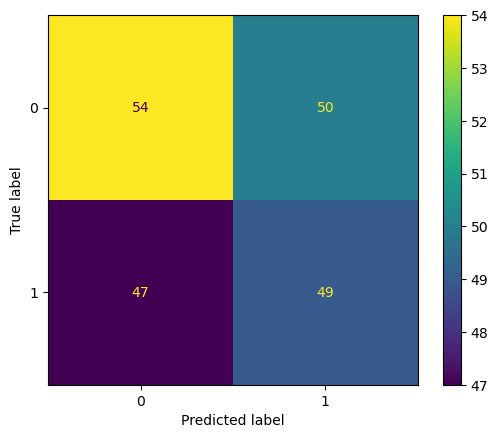

In [22]:
#docs_infra: no_execute
classes = [0, 1, 2, 3, 4]
classes = [0, 1]
cm=confusion_matrix(y_test_def2, y_pred2,labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
# model.save('modelos/modelote1203_200')  # creates a HDF5 file 'my_model.h5'

In [18]:
model.save('modelos/modelo_perfecto_{}_{}'.format(experimento,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))) 

INFO:tensorflow:Assets written to: modelos/modelo_perfecto_AgilentplusP1_y_P1_GRU2_2_clases_bidireccional50_dense_onehot_50_loss_categorical_crossentropy_lr_0.001_algoritmo_RMSprop_20240513-200626/assets


INFO:tensorflow:Assets written to: modelos/modelo_perfecto_AgilentplusP1_y_P1_GRU2_2_clases_bidireccional50_dense_onehot_50_loss_categorical_crossentropy_lr_0.001_algoritmo_RMSprop_20240513-200626/assets


In [19]:
from scipy import stats
y_pred = model.predict(X_test_def)
#y_pred2 = scaler_out.inverse_transform(y_pred) #valor denormalizado

#y_pred1=y_pred[:,-1]
y_pred2=np.argmax(y_pred,axis=1)
n = len(y_pred2)
reshaped = y_pred2[:n//4*4].reshape(-1, 4)
mean_values = reshaped.mean(axis=1)

mean_values = np.round(mean_values)
mean_values = np.clip(mean_values, 0, 4)
mean_values = mean_values.astype(int)
print(mean_values)

mode_values = stats.mode(reshaped, axis=1)[0]
print(mode_values)

# Convierte los arrays a DataFrames
mean_df = pd.DataFrame(mean_values, columns=['mean'])
mode_df = pd.DataFrame(mode_values, columns=['mode'])

# Guarda los DataFrames en archivos Excel
mean_df.to_excel("clasificacion_P1_mean_best7.xlsx", index=False)
mode_df.to_excel("clasificacion_P1_mode_best7.xlsx", index=False)
print(y_pred)

7/7 [==============================] - 0s 20ms/step
[0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0]
[[0.2890185  0.7109815 ]
 [0.25974935 0.7402506 ]
 [0.6265267  0.37347326]
 [0.594642   0.40535802]
 [0.1506574  0.8493426 ]
 [0.19056003 0.8094399 ]
 [0.37512746 0.62487257]
 [0.45366895 0.54633105]
 [0.33225852 0.6677414 ]
 [0.4213142  0.5786858 ]
 [0.47111464 0.52888536]
 [0.2676447  0.73235524]
 [0.43937042 0.56062955]
 [0.27023312 0.72976685]
 [0.21835884 0.7816411 ]
 [0.34956178 0.6504382 ]
 [0.17569996 0.82430005]
 [0.22068152 0.7793185 ]
 [0.73357314 0.2664268 ]
 [0.4654677  0.5345323 ]
 [0.24435133 0.75564873]
 [0.2206654  0.7793346 ]
 [0.61557984 0.38442013]
 [0.30964088 0.69035906]
 [0.38777375 0.61222625]
 [0.22103529 0.77896476]
 [0.5828631  0.41713682]
 [0.5043231  0.4956769 ]
 [0.26533496 0.73466504]
 [0.1934433  0.80

In [20]:
print(y_pred2)

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0]
